# Transform EEG data using current source density (CSD)

This script shows an example of how to use CSD. CSD takes the
 spatial Laplacian of the sensor signal (derivative in both x and y).
 It does what a planar gradiometer does in MEG. Computing these spatial
 derivatives reduces point spread. CSD transformed data have a sharper
 or more distinct topography, reducing the negative impact of volume
 conduction.

Good video <a href="https://www.youtube.com/watch?v=CodQ5-pmXdQ">Mike X Cohent</a>
about Surface Laplacian for connectivity analyses

In [7]:
'''
https://mne.tools/dev/auto_examples/preprocessing/eeg_csd.html
'''
import matplotlib.pyplot as plt
import mne
from mne import read_epochs
from mne.preprocessing import compute_current_source_density
from gtheory import config as cf
import os
pt = cf.root_path ()
print('test')

test


In [8]:
print('Loading File')

opath=os.path.join(pt['source_local'],pt['epochs_concat_for_csd_evaluation'])
epochs=read_epochs(opath,preload=True)

Loading File
Reading /mnt/d/data_set/sustained_attention_driving - Copy/source_local/epochs_concat_for_csd_evaluation-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 30) active
    Found the data of interest:
        t =   -8000.00 ...       0.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
2976 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


projection as noise reduction
Projections of EEG or MEG signals work in very much the same way: the point corresponds to the value of each sensor at a single time point, and the projection matrix varies depending on what aspects of the signal (i.e., what kind of noise) you are trying to project out. The only real difference is that instead of a single 3-dimensional point you’re dealing with a time series of -dimensional “points” (one at each sampling time), where is usually in the tens or hundreds (depending on how many sensors your EEG/MEG system has). Fortunately, because projection is a matrix operation, it can be done very quickly even on signals with hundreds of dimensions and tens of thousands of time points.

In [9]:
# epochs.set_eeg_reference(projection=True).apply_proj()

compute current source density for each epochs

In [10]:
lambda2=1e-5
stiffness=4
epochs_csd=compute_current_source_density ( epochs, lambda2=lambda2, stiffness=stiffness )

Fitted sphere radius:         90.1 mm
Origin head coordinates:      0.8 6.7 51.6 mm
Origin device coordinates:    0.8 6.7 51.6 mm


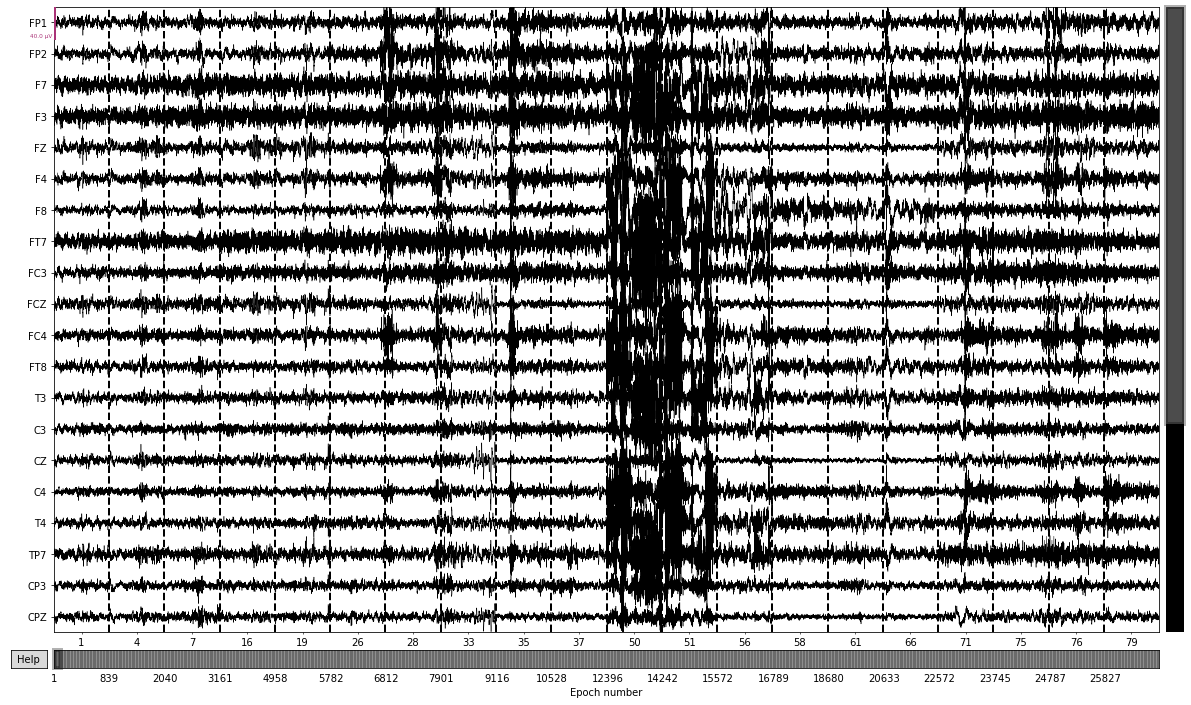

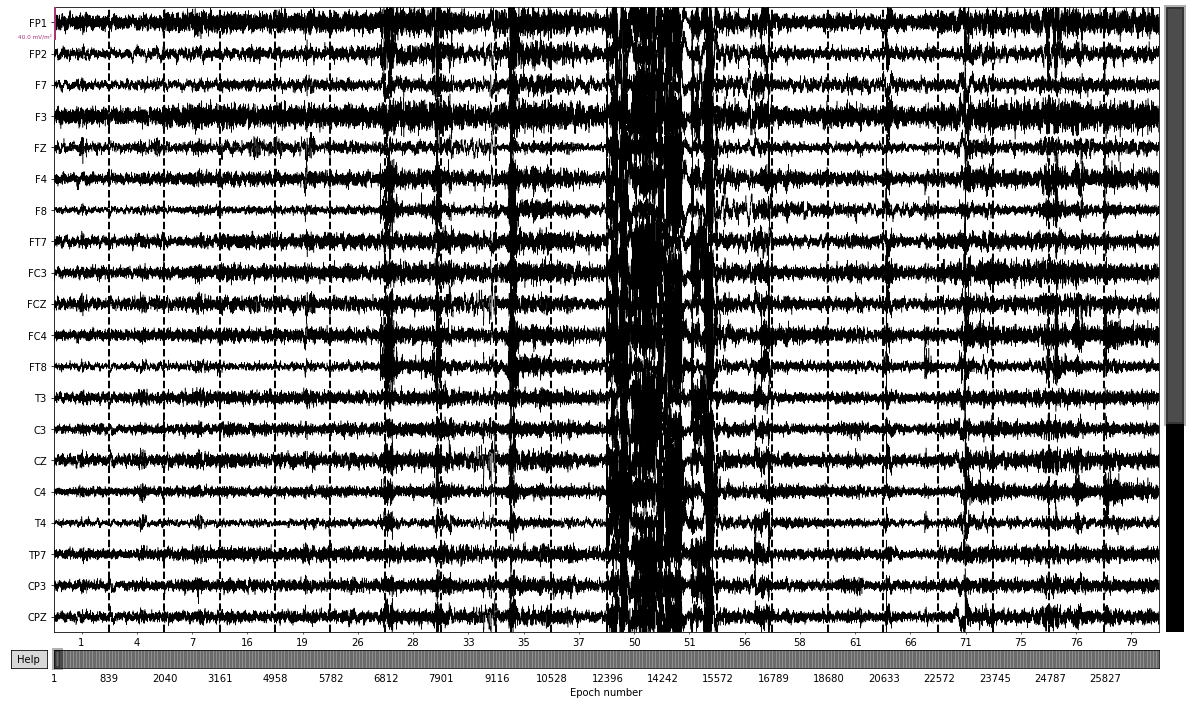

In [11]:
epochs.plot(title='test');
epochs_csd.plot(); # Note that, duplicate when plot in Notebook


compute current source density for evoked (average epochs)

In [12]:
evoked = epochs.average()
lambda2=1e-5
stiffness=4
evoked_csd=compute_current_source_density ( evoked, lambda2=lambda2, stiffness=stiffness )

Fitted sphere radius:         90.1 mm
Origin head coordinates:      0.8 6.7 51.6 mm
Origin device coordinates:    0.8 6.7 51.6 mm


Plot the evoked data and CSD-transformed evoked data:

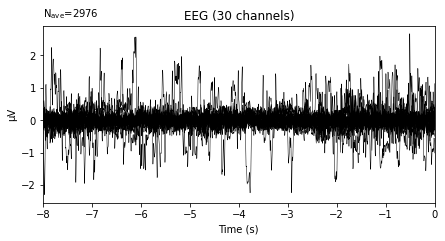

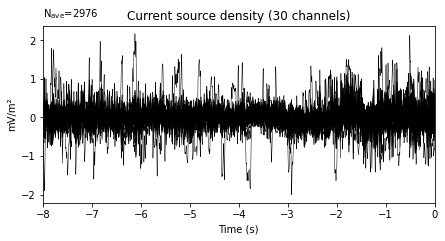

In [13]:
evoked.plot();
evoked_csd.plot();
# plt.show()

Also look at the power spectral densities:

Projections have already been applied. Setting proj attribute to True.
Projections have already been applied. Setting proj attribute to True.


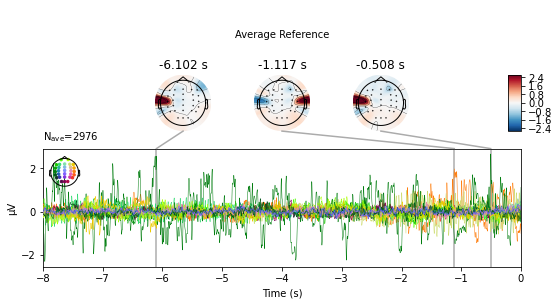

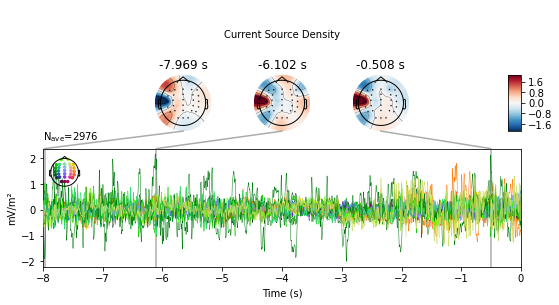

In [14]:
evoked.plot_joint(title='Average Reference', show=False);
evoked_csd.plot_joint(title='Current Source Density');

CSD has parameters stiffness and lambda2 affecting smoothing and spline flexibility,
respectively. Let’s see how they affect the solution:

NOTE: In Jupyter Noteboook, the csd figures were hidden at the bottom of the log. Please scroll to the bottom to get
the csd plot

Fitted sphere radius:         90.1 mm
Origin head coordinates:      0.8 6.7 51.6 mm
Origin device coordinates:    0.8 6.7 51.6 mm
Fitted sphere radius:         90.1 mm
Origin head coordinates:      0.8 6.7 51.6 mm
Origin device coordinates:    0.8 6.7 51.6 mm
Fitted sphere radius:         90.1 mm
Origin head coordinates:      0.8 6.7 51.6 mm
Origin device coordinates:    0.8 6.7 51.6 mm
Fitted sphere radius:         90.1 mm
Origin head coordinates:      0.8 6.7 51.6 mm
Origin device coordinates:    0.8 6.7 51.6 mm
Fitted sphere radius:         90.1 mm
Origin head coordinates:      0.8 6.7 51.6 mm
Origin device coordinates:    0.8 6.7 51.6 mm
Fitted sphere radius:         90.1 mm
Origin head coordinates:      0.8 6.7 51.6 mm
Origin device coordinates:    0.8 6.7 51.6 mm
Fitted sphere radius:         90.1 mm
Origin head coordinates:      0.8 6.7 51.6 mm
Origin device coordinates:    0.8 6.7 51.6 mm
Fitted sphere radius:         90.1 mm
Origin head coordinates:      0.8 6.7 51.6 mm
Origin

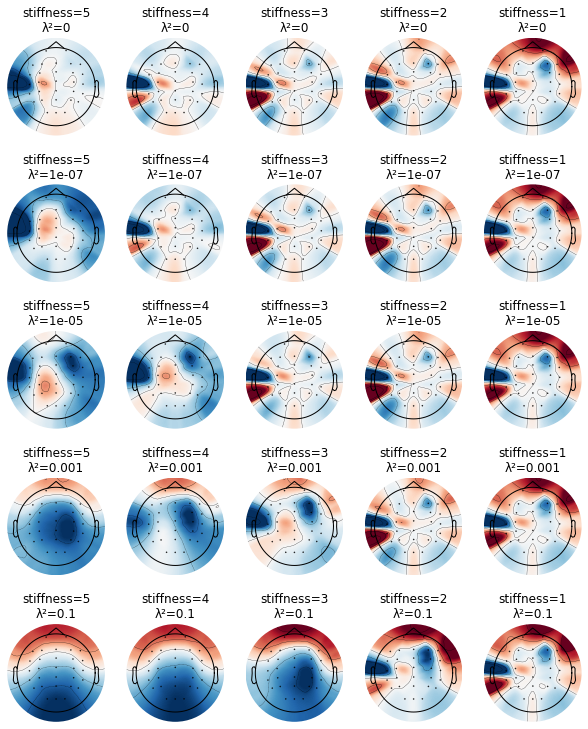

In [15]:
fig, ax = plt.subplots(5, 5)
fig.subplots_adjust(hspace=0.5)
fig.set_size_inches(10, 10)
for i, lambda2 in enumerate([0, 1e-7, 1e-5, 1e-3 , 1e-1]):
    for j, m in enumerate([5, 4, 3, 2,1]):
        this_evoked_csd = mne.preprocessing.compute_current_source_density(
            evoked, stiffness=m, lambda2=lambda2)
        this_evoked_csd.plot_topomap(
            -3, axes=ax[i, j], outlines='skirt', contours=4, time_unit='s',
            colorbar=False, show=False)
        ax[i, j].set_title('stiffness=%i\nλ²=%s' % (m, lambda2))

In [16]:
plt.show()